# 6.2 Exploring Relationships

### contents
01. Import Libraries & Data set
02. Exploring Relationships
03. Creating Matrix Heatmap
04. Creating a Scatterplot
05. Pair Plot
06. Creating a Categorical Plot
07. Research Questions
08. Hypothesis Discussion


## 01. Import Libraries & Data set

In [35]:
# Importing Libraries & Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [36]:
# create path
path = r'C:\Users\Dell\Documents\IBM Watson Marketing Customer Value Data'

In [37]:
# import customer_value dataset
df = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'customer_value_new.pkl'))

In [38]:
df.shape

(9134, 23)

In [39]:
df.columns

Index(['Customer Id', 'State', 'Customer Lifetime Value', 'Response',
       'Coverage', 'Policy Expiry Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [40]:
df.dtypes

Customer Id                       object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Policy Expiry Date                object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

## 02. Exploring Relationships

In [41]:
# Dropping unneeded columns and creating data subset
df_sub = df.select_dtypes(include=['float64', 'int64'])

In [42]:
df_sub.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


## 03 Creating Matrix Heatmap

In [43]:
# Creating correlation table between variables
df_sub.corr()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


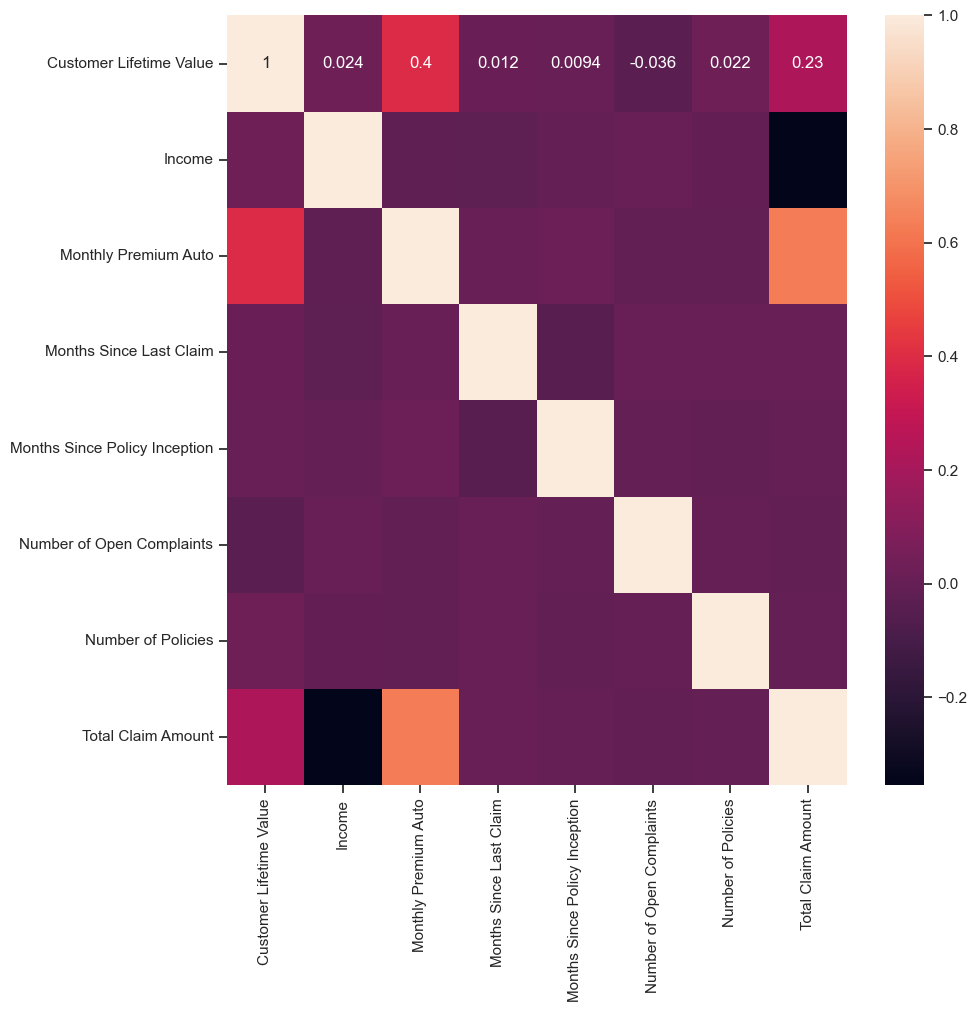

In [44]:
# Creating subplot using matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Creating matrix heatmap using seaborn
corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax)

#### Customer Lifetime Value (CLV) shows highest positive correlations with Monthly Premiums and Total Claim Amounts. Will take deeper dive to examine those correlations in a scatter plot.

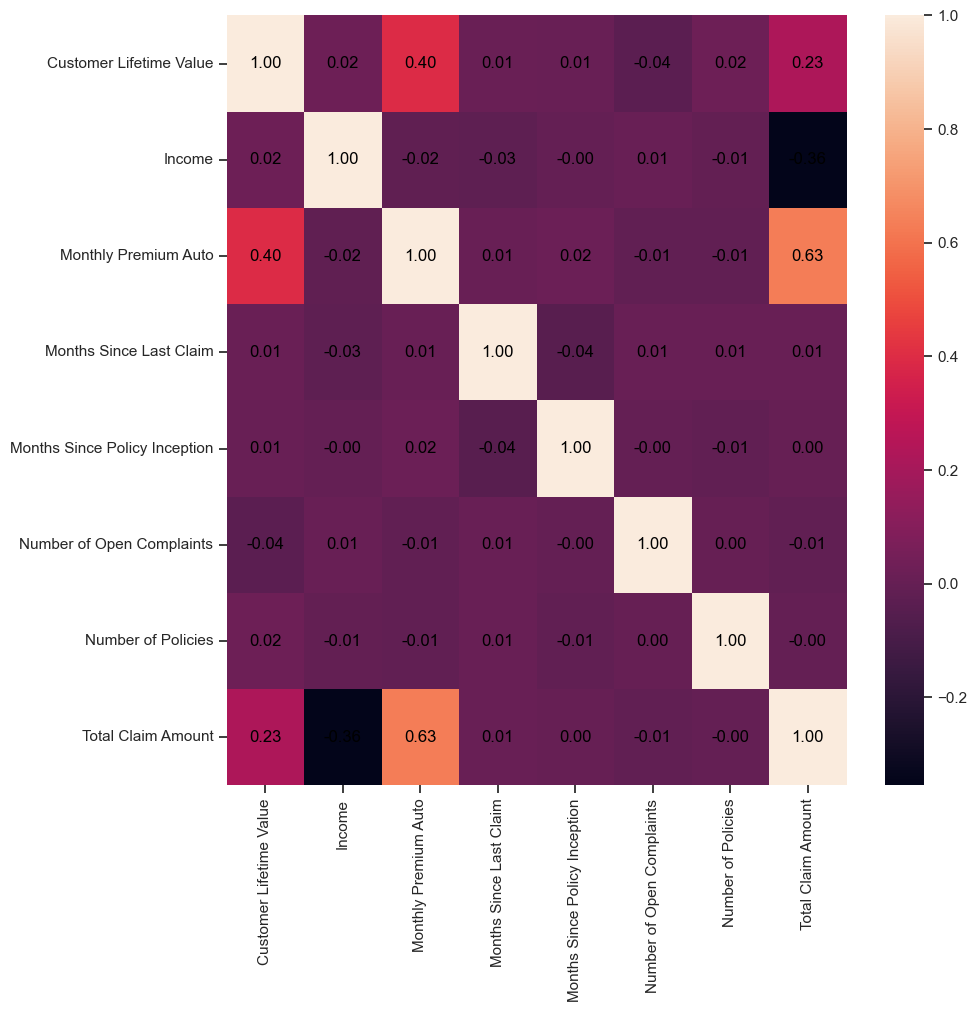

In [66]:
# Filter out non-numeric columns or replace non-numeric values with NaNs
numeric_df_sub = df_sub.select_dtypes(include=np.number)

# Create subplot using matplotlib
f, ax = plt.subplots(figsize=(10, 10))

# Create matrix heatmap using seaborn
corr = sns.heatmap(numeric_df_sub.corr(), ax=ax)

# Loop over the cells and annotate them individually
for i in range(len(numeric_df_sub.columns)):
    for j in range(len(numeric_df_sub.columns)):
        ax.text(j+0.5, i+0.5, '{:.2f}'.format(numeric_df_sub.corr().iloc[i, j]), ha='center', va='center', color='black')

## 04 Creating a Scatterplot

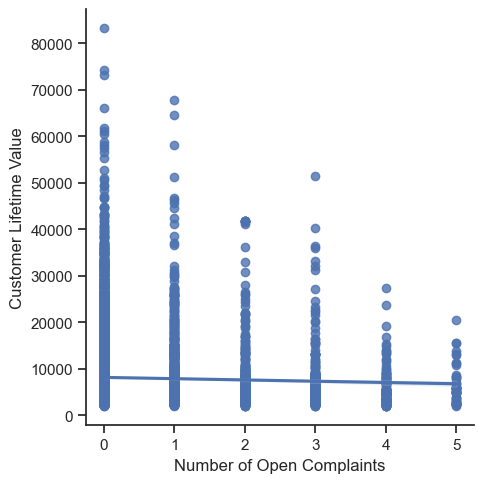

In [45]:
# Monthly Premium Auto and Customer Lifetime Value scatterplot
sns.lmplot(x='Number of Open Complaints', y='Customer Lifetime Value',data=df)

#### The scatter plot depicting CLV and the number of complaints indicates that solely relying on the quantity of open complaints might not strongly predict CLV. Other variables could also impact CLV, suggesting the necessity for additional analysis to gain a more comprehensive understanding of their relationship.it seems that customers with lower complaints tend to have higher CLV compared to those with higher complaints. While there are outliers with higher CLV values among customers with both higher and lower complaints, the general trend suggests that as the number of complaints increases, the CLV tends to decrease

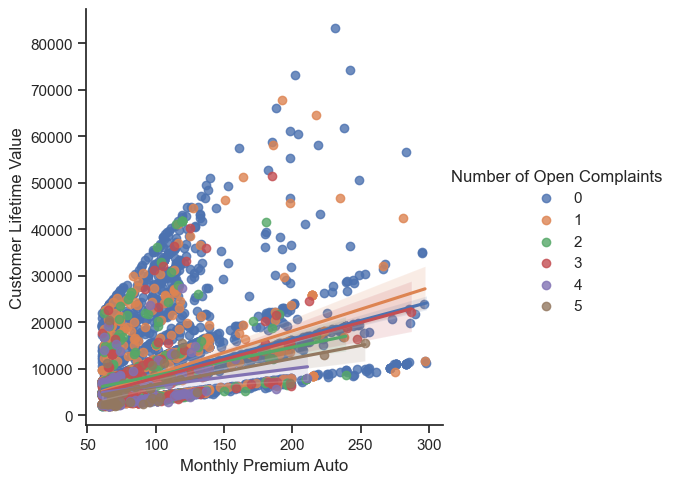

In [46]:
# Scatterplot of most correlated variables
# Monthly Premium Auto and Customer Lifetime Value scatterplot
sns.lmplot(x='Monthly Premium Auto', y='Customer Lifetime Value',hue='Number of Open Complaints',data=df)

#### There is a general positive correlation between Monthly Premium Auto and Customer Lifetime Value, meaning as the monthly premium increases, the lifetime value of the customer also tends to increase.The spread of data points suggests there is considerable variance in customer lifetime value at most levels of monthly premium, indicating other factors may also influence lifetime value.The majority of data points, regardless of the number of complaints, seem to follow the same trend, with no immediate indication that the number of open complaints has a significant impact on the customer lifetime value in relation to the monthly premium paid.Based on this graph, more in-depth statistical analysis would be required to determine if the number of complaints has a statistically significant effect on the relationship between monthly premiums and customer lifetime value.

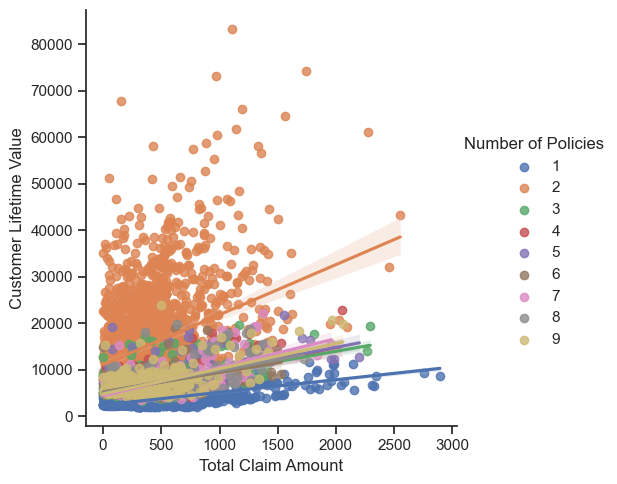

In [47]:
# Scatterplot of most correlated variables
# Total Claim Amountand Customer Lifetime Value scatterplot
sns.lmplot(x='Total Claim Amount', y='Customer Lifetime Value',hue='Number of Policies',data=df)

#### There is a general positive correlation between the Total Claim Amount and the Customer Lifetime Value. This suggests that as the amount claimed by the customer increases, so does the value of the customer over their lifetime..Customers with fewer policies (1 to 3) tend to have lower Customer Lifetime Values, and those with more policies (4 and above) show higher values. This could indicate that customers who hold more policies are more valuable to the company over the long term.There is a higher concentration of data points at the lower end of both the Total Claim Amount and Customer Lifetime Value. This implies that the majority of customers have lower claim amounts and correspondingly lower lifetime values..There are a few outliers with very high Customer Lifetime Values, especially among customers with 2 and 4 policies. These outliers may represent particularly valuable customers or could be due to other factors not explained by the number of policies alone.

## 05. Pair Plot

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

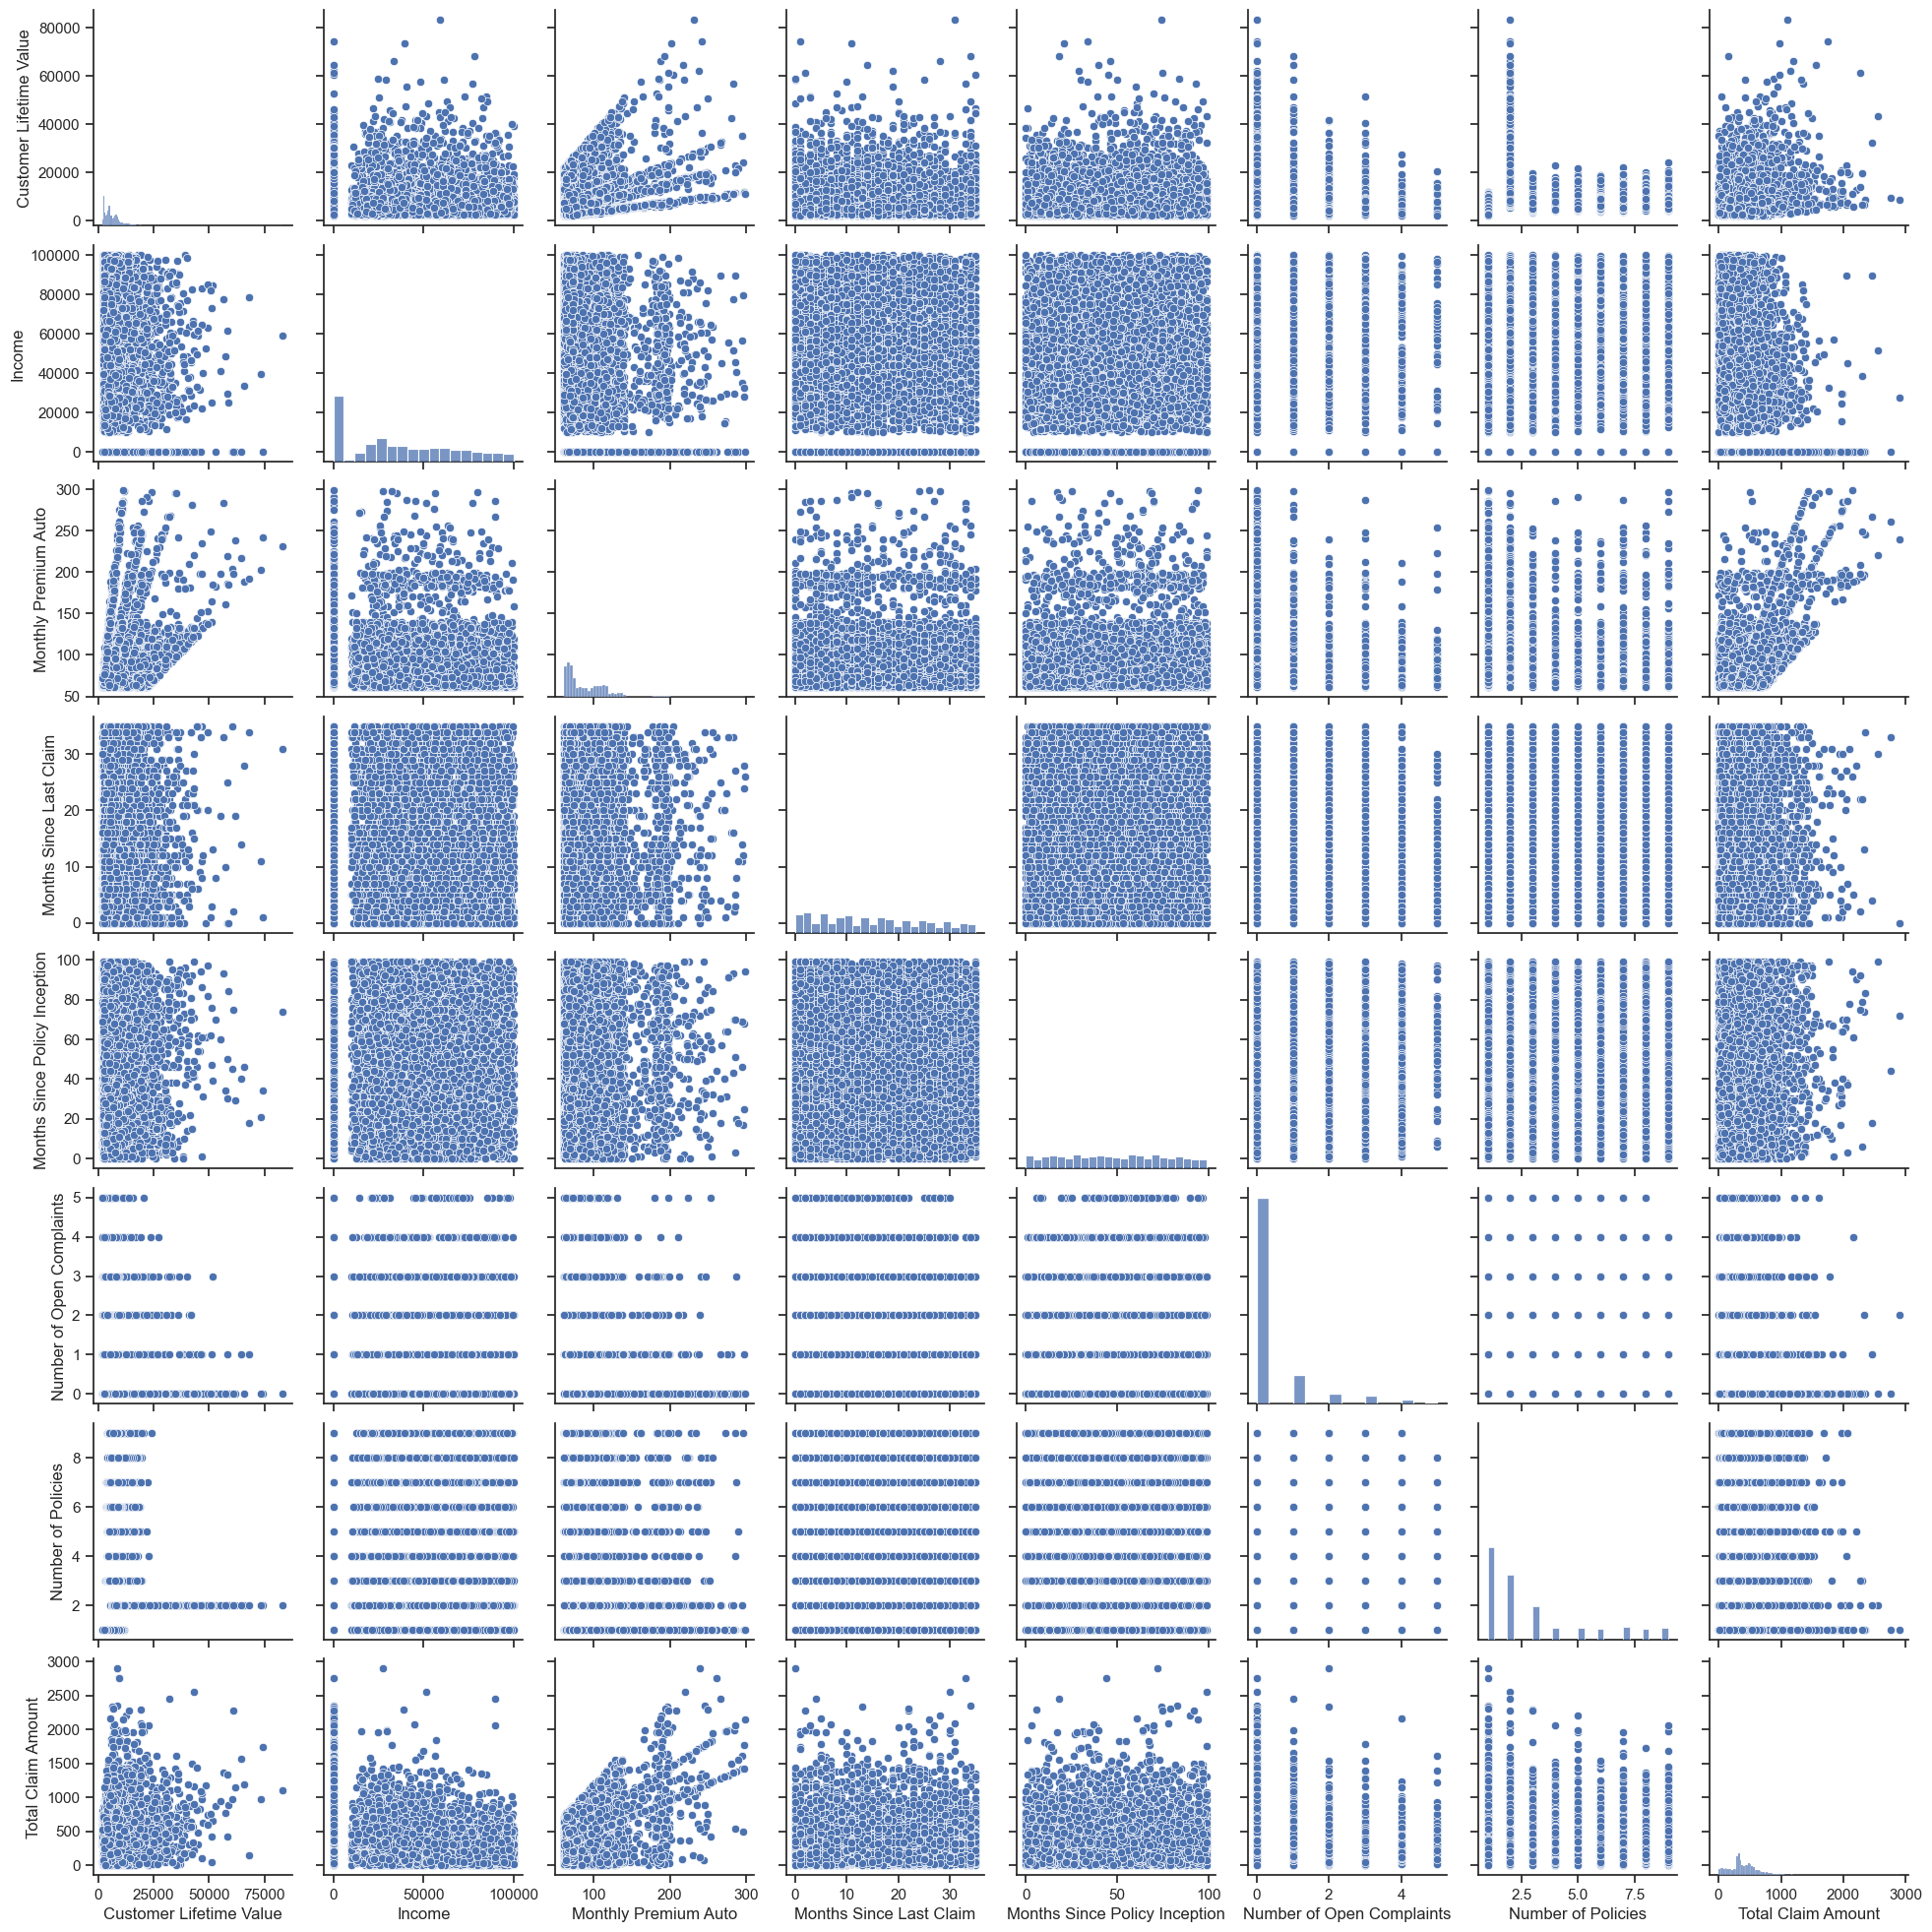

In [48]:
# Create a pair plot 

g = sns.pairplot(df_sub)

In [49]:
# Creating smaller subsection to see just strongest variables
Interested_columns=['Customer Lifetime Value','Monthly Premium Auto','Number of Open Complaints', 'Number of Policies',]

In [50]:
sub_df1= df[Interested_columns]

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

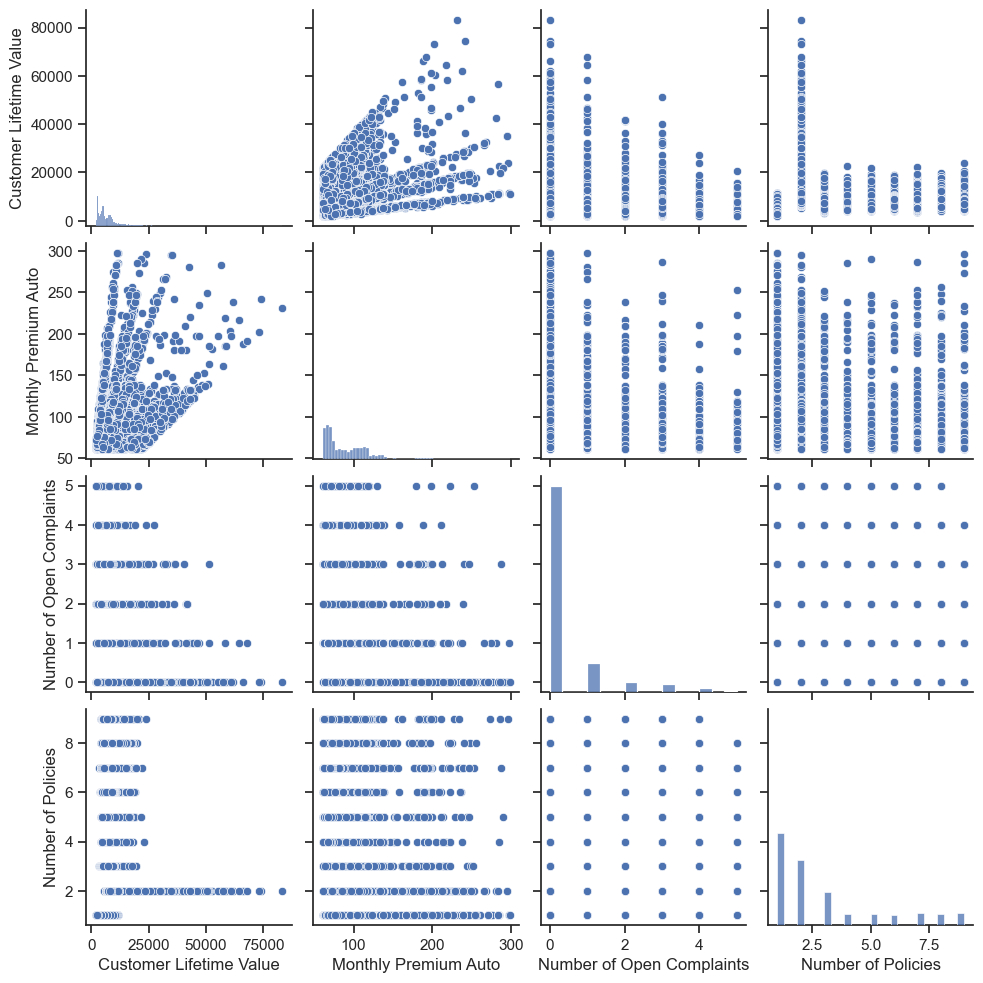

In [51]:
# Create a pair plot 

g = sns.pairplot(sub_df1)

In [52]:
# Creating smaller subsection to see just strongest variables
Interested_columns1=['Customer Lifetime Value','Income','Total Claim Amount','Months Since Last Claim']

In [53]:
sub_df2= df[Interested_columns1]

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

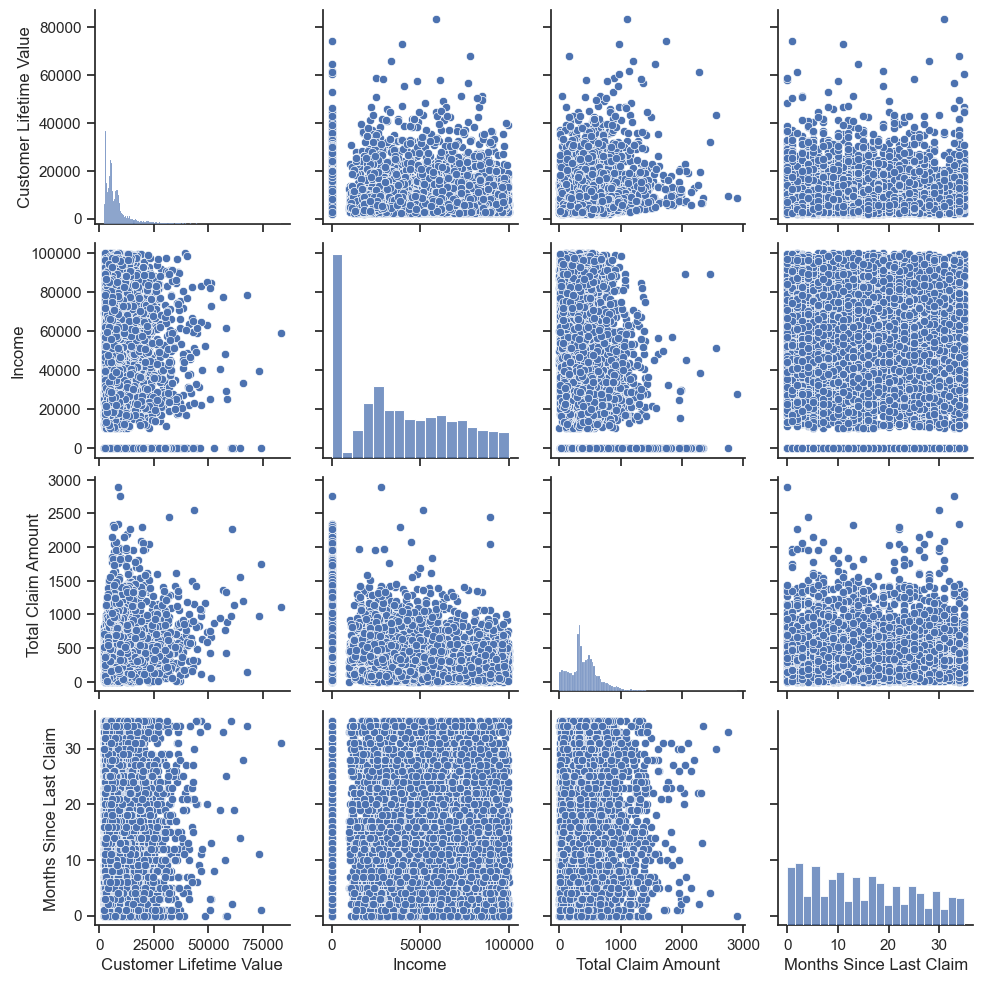

In [54]:
# Create a pair plot 
g = sns.pairplot(sub_df2)

#### The pair plot depicting strong correlations appeared as anticipated. The visualizations indicated robust correlations among all variables, particularly noteworthy were the relationships between Customer Lifetime Value (CLV), Monthly Premium Auto, Number of Open Complaints, Number of Policies, and Claim Amount. I'm intrigued to delve deeper into exploring the categorical variables that exhibit correlation with CLV.

## 06. Creating a Categorical Plot

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Customer Lifetime Value', ylabel='Count'>

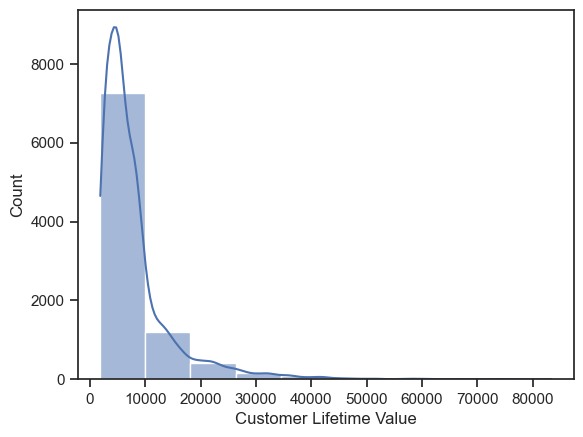

In [55]:
# Creating a histogram to see distribution
sns.histplot(df_sub['Customer Lifetime Value'], bins = 10, kde = True)

In [56]:
# Creating score category for categorical plot
df_sub.loc[df_sub['Customer Lifetime Value'] < 30000 , 'Value category'] = 'Low value'

In [57]:
df_sub.loc[(df_sub['Customer Lifetime Value'] > 30000) & (df_sub['Customer Lifetime Value'] < 60000), 'Value category'] = 'Middle value'

In [58]:
df_sub.loc[(df_sub['Customer Lifetime Value'] > 60000) & (df_sub['Customer Lifetime Value'] < 90000), 'Value category'] = 'High value'

In [59]:
df_sub['Value category'].value_counts(dropna = False)

Value category
Low value       8945
Middle value     180
High value         9
Name: count, dtype: int64

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


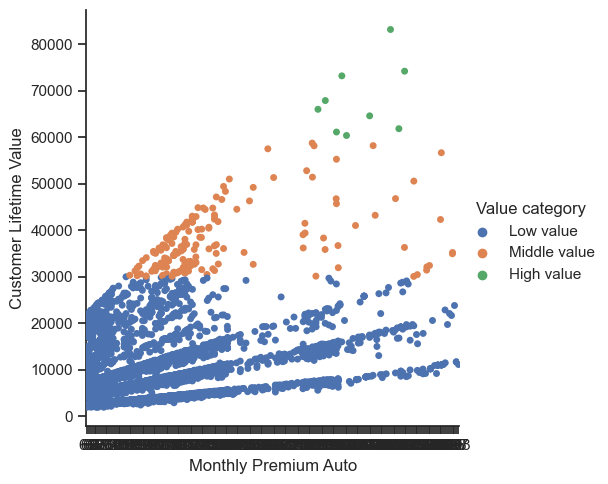

In [60]:
# Creating categorical plot with monthly premium Auto
sns.set(style="ticks")
cat_plot_response = sns.catplot(x='Monthly Premium Auto', y='Customer Lifetime Value', hue='Value category', data=df_sub)

#### Monthly Premium Auto vs. Customer Lifetime Value: The second plot indicates a similar trend where higher monthly premium auto values correspond to higher customer lifetime values. Again, there are clusters of different value categories across the spectrum of monthly premium auto values.

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


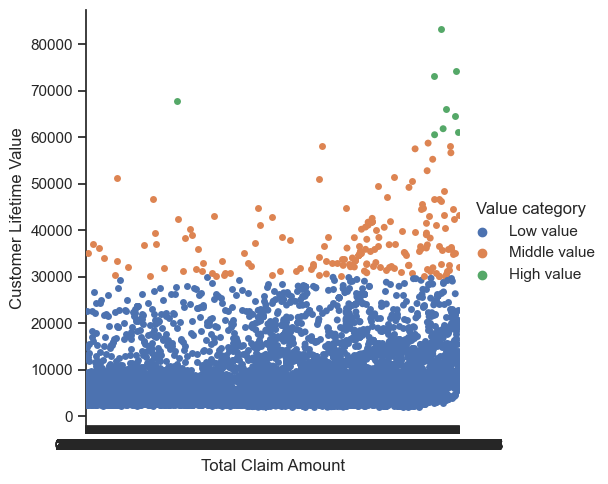

In [61]:
# Creating categorical plot with Total Claim Amount
sns.set(style="ticks")
cat_plot_response = sns.catplot(x='Total Claim Amount', y='Customer Lifetime Value', hue='Value category', data=df_sub)

#### Total Claim Amount vs. Customer Lifetime Value: The first plot shows that as the total claim amount increases, the customer lifetime value tends to increase as well. However, there are clusters of low, middle, and high-value customers at different levels of total claim amount. This suggests that total claim amount alone may not be a sole determinant of customer value.

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


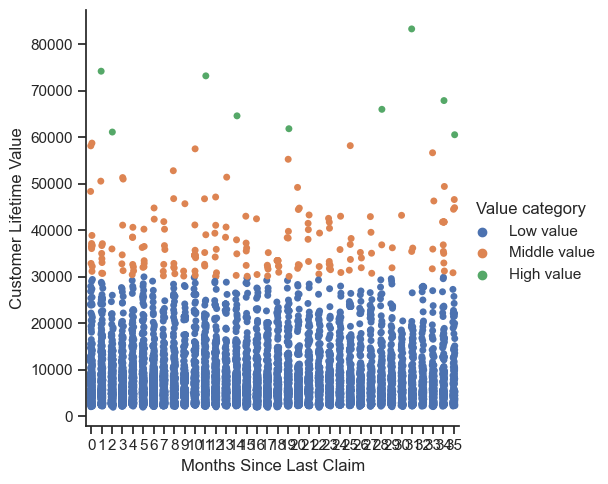

In [62]:
# Creating categorical plot with Months Since Last Claim
sns.set(style="ticks")
cat_plot_response = sns.catplot(x='Months Since Last Claim', y='Customer Lifetime Value', hue='Value category', data=df_sub)

#### Months Since Last Claim vs. Customer Lifetime Value: The third plot reveals a less straightforward relationship. There doesn't seem to be a clear correlation between months since the last claim and customer lifetime value. The data points are spread out across different value categories without a distinct pattern.

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


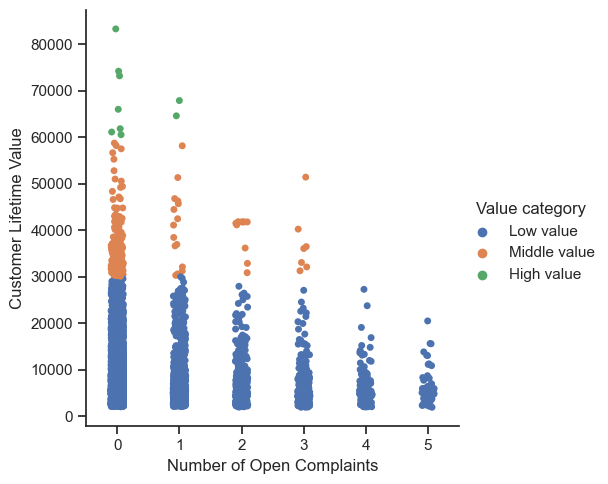

In [63]:
# Creating categorical plot with 'Number of Open Complaints
sns.set(style="ticks")
cat_plot_response = sns.catplot(x='Number of Open Complaints', y='Customer Lifetime Value', hue='Value category', data=df_sub)

#### There exists an inverse correlation between the number of open complaints and customer lifetime value. This implies that customers with fewer complaints may hold greater long-term value for the company.

## 07.Research Questions

#### The explorations I conducted have led me to identify the following key questions.
Is there any correlation between the income of the customers and renewal behavior?,Is there a correlation between the number of unresolved complaints and customer loyalty?, How does the monthly premium amount impact customer retention and response to renewal offer? ,Is there a relationship between the total claim amount and customer loyalty or response to renewal offers?, How does the number of policies a customer owns relate to their response to renewal offers and overall satisfaction?
However, further investigations are necessary to obtain a comprehensive understanding of variables such as customer demographics, policy details, and response. 

## 08. Hypothesis Discussion

#### Hypothesis :  Customers who have a history of making higher total claims or more frequent claims, and who also exhibit higher customer lifetime value, are more likely to accept the new policy offer.

#### Hypothesis : Customers who opt for higher monthly premiums are more likely to stay with the organization.

#### Hypothesis : Implementation of customer engagement initiatives, personalized services, and other retention strategies is expected to raise the customer retention limit.


#### Hypothesis : Customers with fewer complaints will remain in the long term